In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


../../Figs/curve_fitting/polynomial2/single/ already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 1.4659748   0.05673068]
 - Curve Fitting Cost: 2.713576978751978



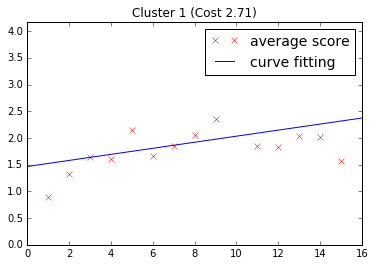

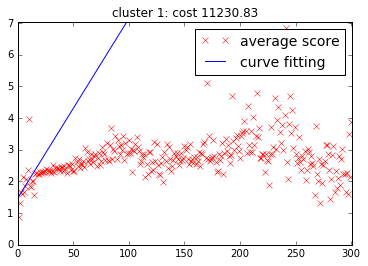

cluster 2:
 - Curve Fitting Parameters: [ 2.30548607 -0.03049812]
 - Curve Fitting Cost: 2.124425099921761



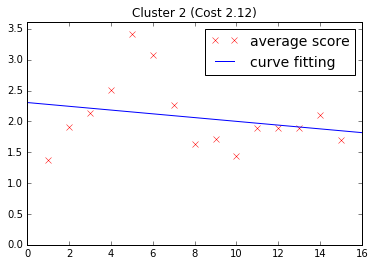

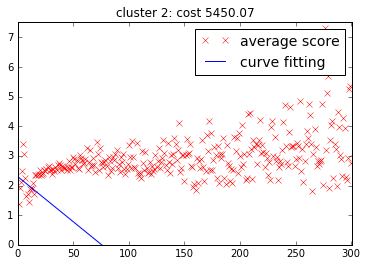

cluster 3:
 - Curve Fitting Parameters: [ 1.89452082  0.022255  ]
 - Curve Fitting Cost: 1.1997255162234375



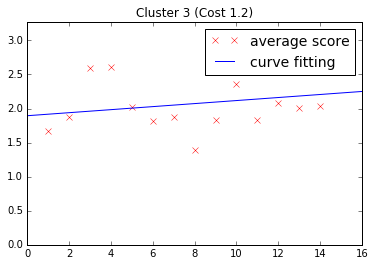

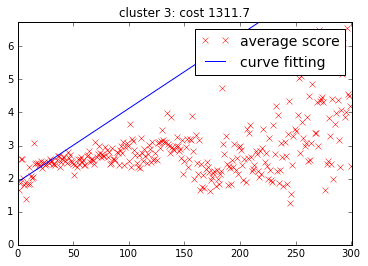

cluster 4:
 - Curve Fitting Parameters: [ 1.65842069  0.02819475]
 - Curve Fitting Cost: 3.370135167669957



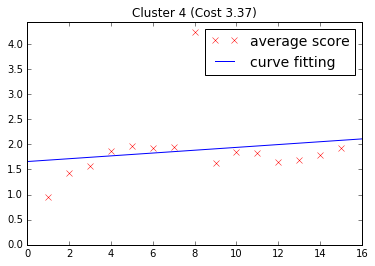

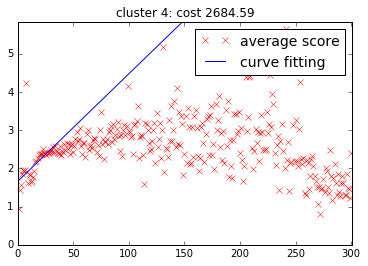

cluster 5:
 - Curve Fitting Parameters: [ 0.55523972  0.12572455]
 - Curve Fitting Cost: 1.3368515934884981



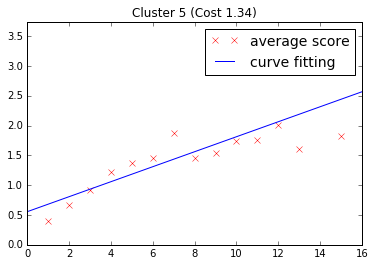

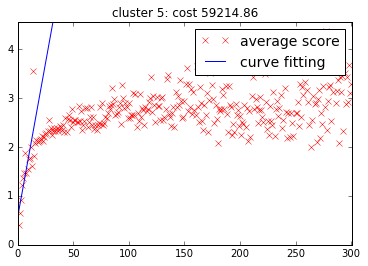

cluster 6:
 - Curve Fitting Parameters: [ 0.89213374  0.10314664]
 - Curve Fitting Cost: 2.0629554201116154



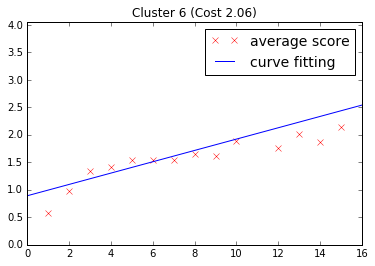

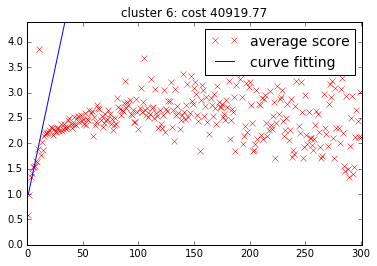

cluster 7:
 - Curve Fitting Parameters: [ 2.46161564 -0.0388028 ]
 - Curve Fitting Cost: 1.6204560954418277



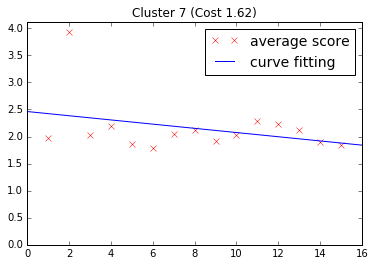

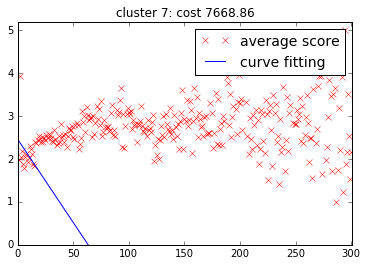

cluster 8:
 - Curve Fitting Parameters: [ 1.05931357  0.08995425]
 - Curve Fitting Cost: 2.2327224413203304



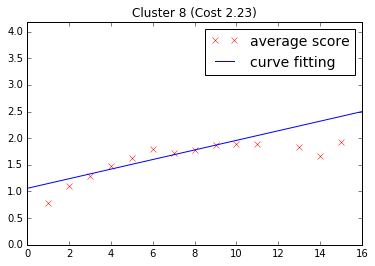

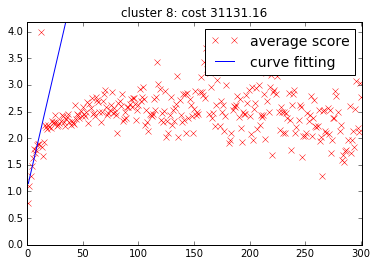

cluster 9:
 - Curve Fitting Parameters: [ 0.86256825  0.11143102]
 - Curve Fitting Cost: 1.9702719025813864



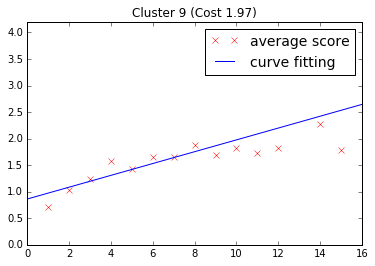

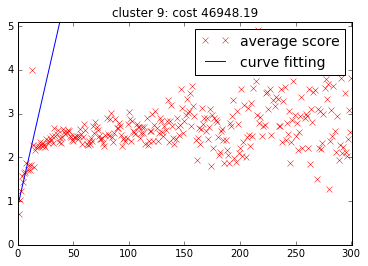

cluster 10:
 - Curve Fitting Parameters: [ 1.39327781  0.05045462]
 - Curve Fitting Cost: 1.8528296206304211



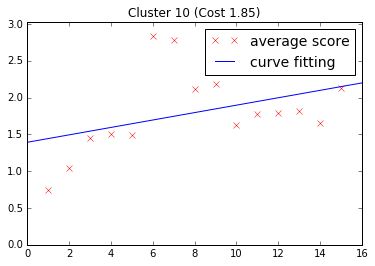

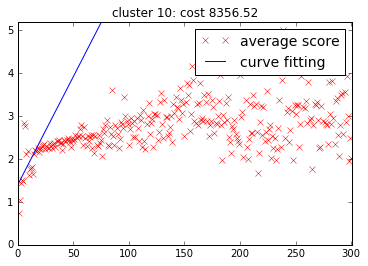

cluster 11:
 - Curve Fitting Parameters: [ 1.37207115  0.0608215 ]
 - Curve Fitting Cost: 3.3996456344401134



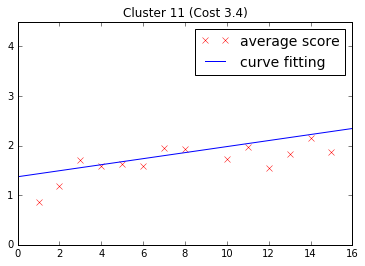

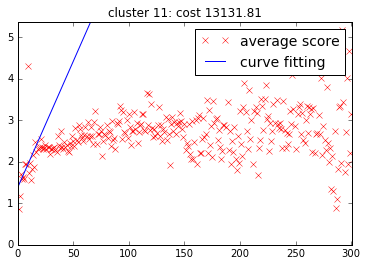

cluster 12:
 - Curve Fitting Parameters: [ 2.66296679 -0.05799336]
 - Curve Fitting Cost: 3.0341399769880426



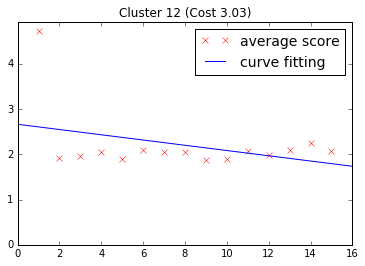

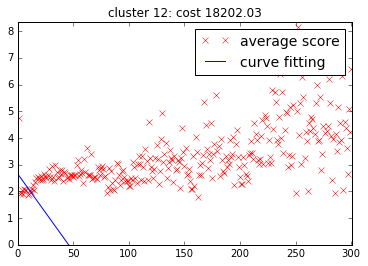

cluster 13:
 - Curve Fitting Parameters: [ 0.59366855  0.14116118]
 - Curve Fitting Cost: 1.8805078197848504



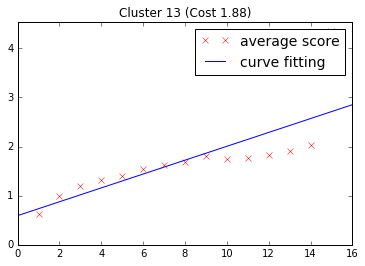

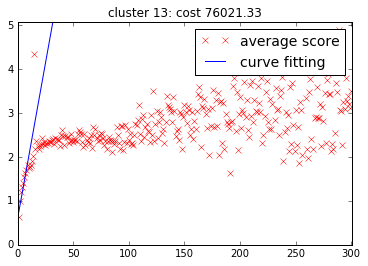

In [4]:
dcp.make_folders("../../Figs/curve_fitting/polynomial2/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    poly_opt, poly_cost = cv.curve_Fitting(
        cv.polynomial_least, cv.polynomial_curve, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed,
        "../../Figs/curve_fitting/polynomial2/single/{0}".format(i+1), clt_num = i+1)

    y_fit = cv.polynomial_curve(attempts300, poly_opt[0], poly_opt[1])
    
    poly_cost300 = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit) # get cost for all data
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit, 
              file_path="../../Figs/curve_fitting/polynomial2/single/valid{0}".format(i), 
              clt_num=i+1, cost = poly_cost300)